# CSPB 3022 Classification Project - Political Text Analysis/Predictions Using Supervised Learning Methods
## Theo Shin

***

<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right" title = "FINAL PROJECT">
</figure>
<img src="trump.jpg" alt="Drawing" WIDTH=600 />

  
## Introduction
This dataset contains the classification of partisan bias, audience, and goals based on politicians' social media. Total rows total ~5000 and the objective is to clean, organize, manipulate data contents to derive meaningful conclusions based on hypotheses and analysis. For the final project, I have chosen sentiment analysis classifying political bias provided texts (in this case tweets). That is, to assign categories to the collection of data (political messaging) in order to aid in more accurate predictions and analysis. The idea of crowdsourcing draws on "wisdom of the crowd" arguments where I used the CrowdFlower/Kaggle database to access the data set to be used for this project, titled, "Political Social Media Posts" (https://www.kaggle.com/crowdflower/political-social-media-posts/data).
    
I chose this topic in particular, not because I'm fascinated with politics, but for the harnessing power of social media and was curious to see how natural language processing (NLP) could computationally identify and categorize opinions expressed in the political messages to determine potential biases. 

Now that a multivariate analysis problem of interest has been identified, the outline of the project shall continue as follows:
1. Selecting Data Sources
2. Preprocess data; Cleaning and transforming data, as needed
3. Perform Exploratory Data Analysis (EDA)
4. Perform Classification
    

*** References Disclaimer ***    
Websites used convert text into meaningful encoding vectors using some corpus (feature vectors may vary widely depending on the proximity of the corpus to the original problem), along with possibly tools to enhance visual flare. 

    
    If you referenced any web sites or solutions not of your own creation, list those references here:
* Word Counter: https://data-flair.training/blogs/python-counter/
* TextBlob Class: https://textblob.readthedocs.io/en/dev/api_reference.html
* Classifiers: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html; https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/
* TfidfTransformer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
* CountVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* Naive Bayes Classifier for Text Analysis: https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67
* Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* Sentiment Analysis Overview: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5635074/
* Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html
***

## Installations:
***
#### textblob and wordcloud (pip install)

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from collections import Counter
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from textblob.classifiers import DecisionTreeClassifier
import scipy.stats
import sklearn.linear_model
import sklearn.discriminant_analysis
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

## GitHub: https://github.com/tshin23/Political-Sentiment-Analysis

## Table of Contents

1. [Sentiment Analysis](#sentiment)
    * [Political Texts](#poli)
    * [Data Source](#Crowdcoding)
    * [Dataset Description](#desc)
    * [Considerations](#consider)
3. [Exploratory Data Analysis](#EDA)
    * [Expected Outcomes](#expect)
    * [Hypotheses](#hypothesis)
    * [Quick Look at Data](#quick)
    * [Word Count](#word)
    * [Character Count](#char)
    * [# Hashtag Count](#hash)
    * [@ Directed Tweets](#@)
    * [Average Word Length](#length)
4. [Pre-Processing](#process) 
    * [Transform into Lower Case](#lower)
    * [Remove Punctuation](#punc)
    * [Stop Words](#stop)
    * [Word Frequency](#freq)
    * [Outlying Words](#rare)
    * [Spelling Bee](#spell)
5. [VISUALS for Text Analysis](#visual) 
    * [Bar Graph for Related Words](#bar)
    * [Word Cloud](#wordcloud)
    * [Spelling Bee](#spell)
6. [Classification](#class) 
    * [Multinomial Naive Bayes](#mnb)
    * [Support Vector Machines](#svm)
7. [Predictive Analysis](#pred)
    * [Sentiment Text Analysis](#sentimentanalysis)
8. [Conclusion](#conc)
    * [Reference: Stop Words](#stopwords)

<a id='sentiment'></a>
### Sentiment Analysis
Sentiment analysis is important in the studies of news values, public opinion, negative campaigning or political polarization and the expansion of digital textual data and efficient progress in automated text analysis provides vast opportunities for innovated social sciences [research] (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5635074/). In general, a lack of tools and procedures for producing or collecting sentiment ratings of acceptable quality for large-scale data analyses currently limits the ease of use with this data mining technique. Typically with emphasis on large scale data, research projects can quickly overwhelm when faced with restrictions of time, money, limited trained coders. 

<a id='poli'></a>
### Measuring Sentiment in Political Texts

Analyzing the polarity of texts has a long tradition in social sciences. A prominent example is media negativity, capturing the over-selection of negative over positive news, the tonality of media stories, and the degree of conflict or confrontation in news. With sentiment analysis, a large dataset can be classified with variying polarity, valence or tone and classified as simply positive, negative, or neutral. For the purposes of this project, supervised learning automated approaches will be employed to "learn" the sentiment of political messages (Note - the instructions governing the dataset will be kept at a beginner due to time constraints and limits on the tools available to me). Latter analyses will introduce supervised learning techniques from course discussions and set up the basics of supervised machine learning in the realm of text analysis.

<a id='Crowdcoding'></a>
### Data Source

As noted in the introduction, the idea of crowdsourcing draws on "wisdom of the crowd" arguments where I used the CrowdFlower/Kaggle database to access the data set to be used for this project, titled, "Political Social Media Posts" (https://www.kaggle.com/crowdflower/political-social-media-posts/data). For project consideration, we will later delve deeper into selecting relevant words from the political messages to try and accurately predict meaning and predictions. 

This dataset contains the results from contributors analyzing thousands of social media messages from U.S. Senators and other American politicians to classify its contents. Messages were broken down into audience (national or the tweeter’s constituency), bias (neutral/bipartisan, or biased/partisan), and finally tagged as the actual substance of the message itself (options ranged from informational, announcement of a media appearance, an attack on another candidate, etc.)

<a id='desc'></a>
### Full Data Description: [political_social_media.csv]

1. __unit_id__ : A unique id for the message
2. __golden__: always FALSE; (classifier for whether the message meets Crowdflower's gold standard) 
3. __unit_state__: always "finalized"
4. __trusted_judgments__: the number of trusted human judgments that were entered for this message; an integer between 1 and 3
5. __last_judgment_at__: when the final judgment was collected
6. __audience__: one of national or constituency
7. __audience:confidence__: a measure of confidence in the audience judgment; a float between 0.5 and 1
8. __bias__: one of neutral of partisan
9. __bias:confidence__: a measure of confidence in the bias judgment; a float between 0.5 and 1
10. __message__: the aim of the message. one of: -- attack: the message attacks another politician 
    * (0) constituency: the message discusses the politician's constituency 
    * (1) information: an informational message about news in government or the wider U.S.  
    * (2) media: a message about interaction with the media 
    * (3) mobilization: a message intended to mobilize supporters 
    * (4) other: a catch-all category for messages that don't fit into the other 
    * (5) personal: a personal message, usually expressing sympathy, support or condolences, or other personal opinions 
    * (6) policy: a message about political policy 
    * (7) support: a message of political support
12. __message:confidence__: a measure of confidence in the message judgment; a float between 0.5 and 1
13. __orig_golden__: always empty; presumably whether some portion of the message was in the gold standard
14. __audience_gold__: always empty; presumably whether the audience response was in the gold standard
15. __bias_gold__: always empty; presumably whether the bias response was in the gold standard
16. __bioid__: a unique id for the politician
17. __embed__:HTML code to embed this message
18. __id__: unique id for the message WITHIN whichever social media site it was pulled from
19. __label__: a string of the form "From: firstname lastname (position from state)"
20. __message_gold__: always blank; presumably whether the message response was in the gold standard
21. __source__: where the message was posted; one of "facebook" or "twitter"
17. __text__: the text of the message
 
 

<a id='consider'></a>
### Dataset Considerations
* Description from kaggle: This dataset, from Crowdflower's Data For Everyone Library, provides text of 5000 messages from politicians' social media accounts, along with human judgments about the purpose, partisanship, and audience of the messages. Because contents of this dataset are subject to human judgements, biases of the message components, it will be interesting to observe how much of the data is subjected to human persuasion (especially confidence level measurements). 
***

<a id='EDA'></a>
## Exploratory Data Analysis (EDA)

<a id='expect'></a>
### Expected Outcomes

From this point, I will: 
1. Explore, clean, and modify the political message dataset to determine meaningful relationships between certain words and message types as indictaed by qualified human assessors from varying social media posts.

2. Determine how certain words in tweets/posts are correlated with political messages using heatmap/wordcloud.

3. Tranform data and perform linear, logistic regression, or other classification methods -- Decision tree classifiers: applying Naive Bayes or Support Vector Machine based algorithms for supervised machine-learning assessment.

4. Determine which classification based method is the stronger predictor for political bias/alignments between Multinomial Naive Bayes (MNB) text classification and Support Vector Machine (SVM) machine learning algorithms.

<a id='hypothesis'></a>
### Hypotheses

1. The SVM classifier will out-predict and provide more accurate results than MNB

2. Anticipation of certain words being highly correlated with certain messages: 
 * veterans = policy; support
 * bill = policy
 * In case you missed it (ICYMI) = media
 * abortion = policy


<a id='quick'></a>
### Quick Look at Data

Let's take a quick look at the first five rows 

In [2]:
politext = pd.read_csv('political_social_media.csv')
politext.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/2015 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/2015 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/2015 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/2015 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.99E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/2015 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.08E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


## Shape of dataset

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(politext.shape[0],politext.shape[1]))


There are 5000 observations and 21 features in this dataset. 



In [4]:
#Looking deeper into the type of values in each column
for column in politext.columns:
    print(str.format("%s   \t# of unique values: %s,   \tdtype: %s" % (column, len(np.unique(politext[column].values)), politext[column].dtype)))

_unit_id   	# of unique values: 5000,   	dtype: int64
_golden   	# of unique values: 1,   	dtype: bool
_unit_state   	# of unique values: 1,   	dtype: object
_trusted_judgments   	# of unique values: 3,   	dtype: int64
_last_judgment_at   	# of unique values: 238,   	dtype: object
audience   	# of unique values: 2,   	dtype: object
audience:confidence   	# of unique values: 31,   	dtype: float64
bias   	# of unique values: 2,   	dtype: object
bias:confidence   	# of unique values: 35,   	dtype: float64
message   	# of unique values: 9,   	dtype: object
message:confidence   	# of unique values: 23,   	dtype: float64
orig__golden   	# of unique values: 5000,   	dtype: float64
audience_gold   	# of unique values: 5000,   	dtype: float64
bias_gold   	# of unique values: 5000,   	dtype: float64
bioid   	# of unique values: 505,   	dtype: object
embed   	# of unique values: 5000,   	dtype: object
id   	# of unique values: 2763,   	dtype: object
label   	# of unique values: 505,   	dtype: obj

<a id='word'></a>
### Let's count the number of words in each message

In [5]:
politext['word_count'] = politext['text'].apply(lambda x: len(str(x).split(" ")))
politext[['text','word_count']].head()

,text,word_count
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,11
1,VIDEO - #Obamacare: Full of Higher Costs and ...,12
2,Please join me today in remembering our fallen...,22
3,RT @SenatorLeahy: 1st step toward Senate debat...,20
4,.@amazon delivery #drones show need to update ...,20


<a id='char'></a>
### How about the number of characters?

In [6]:
politext['char_count'] = politext['text'].str.len() ## this also includes spaces
politext[['text','char_count']].head()

,text,char_count
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,93
1,VIDEO - #Obamacare: Full of Higher Costs and ...,85
2,Please join me today in remembering our fallen...,136
3,RT @SenatorLeahy: 1st step toward Senate debat...,124
4,.@amazon delivery #drones show need to update ...,143


<a id='hash'></a>
### Number of hashtags per tweet

In [7]:
politext['hashtags'] = politext['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
politext[['text','hashtags']].head()

,text,hashtags
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,3
1,VIDEO - #Obamacare: Full of Higher Costs and ...,1
2,Please join me today in remembering our fallen...,0
3,RT @SenatorLeahy: 1st step toward Senate debat...,1
4,.@amazon delivery #drones show need to update ...,4


<a id='@'></a>
### Number of directed tweets (@)

In [8]:
politext['at'] = politext['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
politext[['text','at']].head()

,text,at
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,1
1,VIDEO - #Obamacare: Full of Higher Costs and ...,0
2,Please join me today in remembering our fallen...,0
3,RT @SenatorLeahy: 1st step toward Senate debat...,1
4,.@amazon delivery #drones show need to update ...,0


<a id='length'></a>
### Average word length?

In [9]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

politext['avg_word'] = politext['text'].apply(lambda x: avg_word(x))
politext[['text','avg_word']].head()

,text,avg_word
0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,7.545455
1,VIDEO - #Obamacare: Full of Higher Costs and ...,6.727273
2,Please join me today in remembering our fallen...,5.227273
3,RT @SenatorLeahy: 1st step toward Senate debat...,5.250000
4,.@amazon delivery #drones show need to update ...,6.200000


<a id='process'></a>
## Data Pre-Processsing


Since the scope of the hypotheses are focused on message biases from the text, let's only focus on the relevant columns of "Message", "Bias", "Label", and "Text" and remove all other columns

In [10]:
# Remove columns to keep only those subject to analysis
politext = politext.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'audience', \
                'audience:confidence', 'bias:confidence', 'message:confidence', 'orig__golden', 'audience_gold', \
               'bias_gold', 'bioid', 'embed', 'id', 'message_gold', 'source'], axis=1)



<a id='lower'></a>
## Transform tweets into lower case

In [11]:
politext['text'] = politext['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
politext['text'].head()

0    rt @nowthisnews: rep. trey radel (r- #fl) slam...
1    video - #obamacare: full of higher costs and b...
2    please join me today in remembering our fallen...
3    rt @senatorleahy: 1st step toward senate debat...
4    .@amazon delivery #drones show need to update ...
Name: text, dtype: object

<a id='punc'></a>
## Remove punctuation to clean data

In [12]:
politext['text'] = politext['text'].str.replace('[^\w\s]','')
politext['text'].head()

0    rt nowthisnews rep trey radel r fl slams obama...
1    video  obamacare full of higher costs and brok...
2    please join me today in remembering our fallen...
3    rt senatorleahy 1st step toward senate debate ...
4    amazon delivery drones show need to update law...
Name: text, dtype: object

<a id='stop'></a>
## Removal of Stop Words

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
politext['text'] = politext['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
politext['text'].head()

0    rt nowthisnews rep trey radel r fl slams obama...
1    video obamacare full higher costs broken promi...
2    please join today remembering fallen heroes ho...
3    rt senatorleahy 1st step toward senate debate ...
4    amazon delivery drones show need update law pr...
Name: text, dtype: object

<a id='freq'></a>
## Word Frequency

In [14]:
freq = pd.Series(' '.join(politext['text']).split()).value_counts()[:10]
freq

today        715
us           437
house        433
amp          409
great        395
new          361
bill         323
act          291
congress     289
president    284
dtype: int64

<a id='rare'></a>
## Outliers: Rarest Words

In [15]:
freq = pd.Series(' '.join(politext['text']).split()).value_counts()[-10:]
freq

trayvon              1
britishisraeli       1
sangamon             1
httptcozbevrnkobz    1
deprive              1
usdols               1
httptcoc4jsuubegt    1
undeniable           1
theforum_nmx         1
ncap                 1
dtype: int64

Let's Remove rarely occuring words (Removal reduces vocabulary clutter so features used later are effective)

In [16]:
# freq = list(freq.index)
# politext['text'] = politext['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# politext['text'].head()

<a id='spell'></a>
### Spelling Mistakes/Further Message Pre-processing

In [17]:
from textblob import TextBlob
politext['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    it nowthisnews rep they made r ll slums obamac...
1    video obamacare full higher costs broken promi...
2    please join today remembering fallen heroes ho...
3    it senatorleahy st step toward senate debate l...
4    amazon delivery drones show need update law pr...
Name: text, dtype: object

### Prepare Bias and Message Columns to Categorical

In [18]:
# And Convert the bias and message columns to categorical (this will be helpful for classification methods later on)         
politext.bias = pd.Categorical(politext.bias)
politext.message = pd.Categorical(politext.message)

### Create a "VECTOR" column to create a vector of the TEXT field

In [19]:
# Let's also set up a new column labeled "vector" for words in text field
politext['vector'] = [i for i in politext.text.str.split(" ")]

In [20]:
# Let's now look at the first 10 rows (capitalized column headers)
politext.bias = pd.Categorical(politext.bias)
renameColumns = {'bias' : 'BIAS', 'message' : 'MESSAGE', 'label' : 'LABEL', 'text' : 'TEXT', 'vector' : 'VECTOR'}
politext.rename(mapper = renameColumns, axis = 1, inplace=True)
politext.head(10)

,BIAS,MESSAGE,LABEL,TEXT,word_count,char_count,hashtags,at,avg_word,VECTOR
0,partisan,policy,From: Trey Radel (Representative from Florida),rt nowthisnews rep trey radel r fl slams obama...,11,93,3,1,7.545455,"[rt, nowthisnews, rep, trey, radel, r, fl, sla..."
1,partisan,attack,From: Mitch McConnell (Senator from Kentucky),video obamacare full higher costs broken promi...,12,85,1,0,6.727273,"[video, obamacare, full, higher, costs, broken..."
2,neutral,support,From: Kurt Schrader (Representative from Oregon),please join today remembering fallen heroes ho...,22,136,0,0,5.227273,"[please, join, today, remembering, fallen, her..."
3,neutral,policy,From: Michael Crapo (Senator from Idaho),rt senatorleahy 1st step toward senate debate ...,20,124,1,1,5.250000,"[rt, senatorleahy, 1st, step, toward, senate, ..."
4,partisan,policy,From: Mark Udall (Senator from Colorado),amazon delivery drones show need update law pr...,20,143,4,0,6.200000,"[amazon, delivery, drones, show, need, update,..."
5,partisan,information,From: Heidi Heitkamp (Senator from North Dakota),called usdotfra release info inspections casse...,18,123,1,1,5.888889,"[called, usdotfra, release, info, inspections,..."
6,neutral,mobilization,From: Frederica Wilson (Representative from Fl...,bbcworld help us keep kidnapped nigerian schoo...,15,134,2,1,8.000000,"[bbcworld, help, us, keep, kidnapped, nigerian..."
7,neutral,mobilization,From: Ron Barber (Representative from Arizona),show arizona pridechoose favorite az picture f...,20,139,0,0,6.000000,"[show, arizona, pridechoose, favorite, az, pic..."
8,neutral,personal,From: Chuck Fleischmann (Representative from T...,wonderful night state senator ken yagerûªs chi...,21,145,0,0,5.952381,"[wonderful, night, state, senator, ken, yagerû..."
9,partisan,support,From: Steny Hoyer (Representative from Maryland),great oped pres clinton signing fmla 20 yrs ag...,19,139,2,0,6.368421,"[great, oped, pres, clinton, signing, fmla, 20..."


In [21]:
#Again let's look at the type of values for the remaining columns
for column in politext.columns:
    print("%s       \t# of unique values: %s,   \tdtype: %s" % (column, len(np.unique(politext[column].values)), politext[column].dtype))

BIAS       	# of unique values: 2,   	dtype: category
MESSAGE       	# of unique values: 9,   	dtype: category
LABEL       	# of unique values: 505,   	dtype: object
TEXT       	# of unique values: 4999,   	dtype: object
word_count       	# of unique values: 201,   	dtype: int64
char_count       	# of unique values: 711,   	dtype: int64
hashtags       	# of unique values: 8,   	dtype: int64
at       	# of unique values: 9,   	dtype: int64
avg_word       	# of unique values: 1744,   	dtype: float64
VECTOR       	# of unique values: 4999,   	dtype: object


In [22]:
print("There are {} observations and {} features in this dataset. \n".format(politext.shape[0],politext.shape[1]))


There are 5000 observations and 10 features in this dataset. 



<a id='visual'></a>
## VISUALS FOR TEXT ANALYSIS (EDA)

## DETERMINING 50 MOST/LEAST COMMON WORDS USED IN TWEETS

In [23]:
count_words = Counter()
politext.VECTOR.apply(count_words.update)
print('MOST COMMON WORD (COUNT):\n', count_words.most_common(50))
print('\n\n')
print('LEAST COMMON WORD (COUNT):\n', count_words.most_common()[-250:-200])

MOST COMMON WORD (COUNT):
 [('today', 715), ('us', 437), ('house', 433), ('amp', 409), ('great', 395), ('new', 361), ('bill', 323), ('act', 291), ('congress', 289), ('president', 284), ('day', 283), ('veterans', 276), ('work', 274), ('time', 268), ('help', 261), ('health', 257), ('jobs', 241), ('people', 236), ('state', 234), ('american', 223), ('care', 223), ('government', 221), ('obamacare', 215), ('rt', 214), ('need', 212), ('americans', 211), ('one', 210), ('support', 208), ('service', 205), ('senate', 204), ('week', 202), ('year', 199), ('would', 196), ('thanks', 192), ('families', 191), ('office', 186), ('law', 185), ('national', 185), ('federal', 184), ('make', 182), ('read', 179), ('get', 176), ('first', 168), ('like', 167), ('obama', 166), ('last', 164), ('morning', 163), ('proud', 161), ('must', 160), ('community', 158)]



LEAST COMMON WORD (COUNT):
 [('peterûªs', 1), ('3ûªs', 1), ('meû', 1), ('vermontûªs', 1), ('shelves', 1), ('saveourcheese', 1), ('perseverance', 1), ('rut

Since we've already taken the liberty to clean up articles and common words (using stopwords) we're left with words that are relevantly least used along with words with incorrect spacing, continued misspellings, and hyperlinks. In this case, the least common words used may not have the intended effect for analysis. 

For now, any such discrepancies will be noted and possibly mitigated depending on its effect on the data. In general, as noted during the initial proposal assessment, due to the sentiment analysis classifying political bias given text, categorical classification, correlation coefficient and further regression analysis need not to apply to describing the data. Instead, meaningful encoding vectors and classifiers (concepts discussed in the later weeks) will be used to make further sense of the data.

<a id='bar'></a>
### Bar Graph Representing Related Words

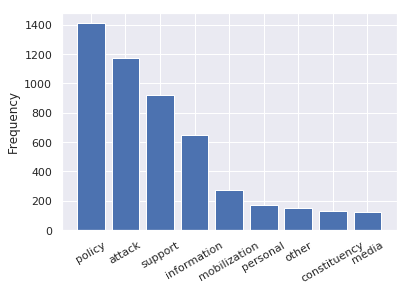

In [24]:
x = politext.MESSAGE.unique()
y = politext.MESSAGE.value_counts()
plt.bar(x, y);
plt.xticks(rotation=30);
plt.ylabel('Frequency');

In [25]:
print("Total Messages:\n",politext.MESSAGE.describe())
print("\nBiased word choices:\n",politext.BIAS.describe())


print("\nMessages containing the word 'proud':\n",politext.MESSAGE[politext.TEXT.str.contains("proud")].describe())
print("\nFor tweets containing the word 'love':\n",politext.MESSAGE[politext.TEXT.str.contains("love")].describe())
print("\nFor tweets containing the word 'hate':\n",politext.MESSAGE[politext.TEXT.str.contains("hate")].describe())
print("\nMessages containing the word 'ICYMI' (In Case You Missed It):\n",politext.MESSAGE[politext.TEXT.str.contains("icymi")].describe())
print("\nFor tweets containing the word 'Obama':\n",politext.MESSAGE[politext.TEXT.str.contains("obama")].describe())
print("\nFor tweets containing the word 'bill':\n",politext.MESSAGE[politext.TEXT.str.contains("bill")].describe())
print("\nFor tweets containing the word 'veterans':\n",politext.MESSAGE[politext.TEXT.str.contains("veterans")].describe())
print("\nFor tweets containing the word 'immigrants':\n",politext.MESSAGE[politext.TEXT.str.contains("immigrants")].describe())
print("\nFor tweets containing the word 'abortion':\n",politext.MESSAGE[politext.TEXT.str.contains("abortion")].describe())

Total Messages:
 count       5000
unique         9
top       policy
freq        1411
Name: MESSAGE, dtype: object

Biased word choices:
 count        5000
unique          2
top       neutral
freq         3689
Name: BIAS, dtype: object

Messages containing the word 'proud':
 count          160
unique           9
top       personal
freq            53
Name: MESSAGE, dtype: object

For tweets containing the word 'love':
 count           53
unique           8
top       personal
freq            25
Name: MESSAGE, dtype: object

For tweets containing the word 'hate':
 count         12
unique         5
top       policy
freq           4
Name: MESSAGE, dtype: object

Messages containing the word 'ICYMI' (In Case You Missed It):
 count         72
unique         6
top       policy
freq          23
Name: MESSAGE, dtype: object

For tweets containing the word 'Obama':
 count        415
unique         9
top       policy
freq         189
Name: MESSAGE, dtype: object

For tweets containing the word 'bil

The bar graph shows a heavy positive skew towards 'policy', 'attack', 'support' type messages. Though these results were somewhat expected, it may be a clear indicator of favoritism towards certain classes of words which influence the 2nd hypothesis (How certain words in tweets/posts are correlated with political messages and their implications).

In [26]:
data = politext['LABEL'].head(n=15000)
states = data.groupby(politext['LABEL']).count()
states.sort_values(ascending=False)


LABEL
From: Ileana Ros-Lehtinen (Representative from Florida)         79
From: Kevin Brady (Representative from Texas)                   69
From: Cory Booker (Senator from New Jersey)                     49
From: John Fleming (Representative from Louisiana)              48
From: Bernard Sanders (Senator from Vermont)                    40
From: Kyrsten Sinema (Representative from Arizona)              37
From: Todd Rokita (Representative from Indiana)                 35
From: Michael Crapo (Senator from Idaho)                        34
From: Darrell Issa (Representative from California)             34
From: John Cornyn (Senator from Texas)                          33
From: Niki Tsongas (Representative from Massachusetts)          33
From: Bill Flores (Representative from Texas)                   31
From: Eric Swalwell (Representative from California)            29
From: Debbie Wasserman Schultz (Representative from Florida)    29
From: Steve Pearce (Representative from New Mexico)     

<a id='wordcloud'></a>
## WORDCLOUD

In [27]:
#What it is..
#?WordCloud

## Visual of WORDCLOUD

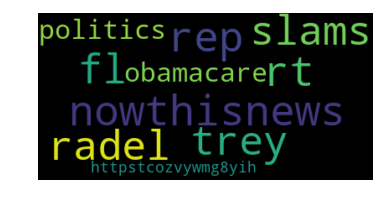

In [28]:
# Let's get a visual of the TEXT column
ptext = politext.TEXT[0]

# Create and generate a world cloud image:
wordcloud = WordCloud().generate(ptext)

# lower max_font_size, change maximum number of words:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(ptext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Delving deeper into word analysis

In [29]:
ptext = " ".join(review for review in politext.TEXT)
print ("There are {} words in the combination of all tweets.".format(len(ptext)))

There are 755933 words in the combination of all tweets.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


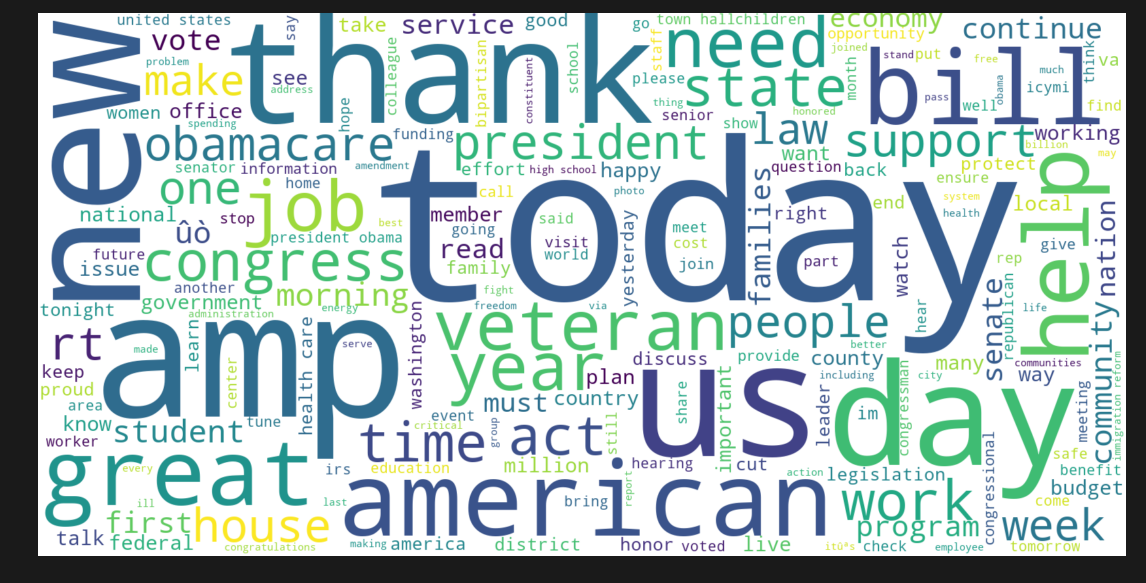

In [30]:
#print(politext)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
# Create stopword list:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1600, height=800, background_color = 'white').generate(ptext)
plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

### HYPOTHESIS #2: Anticipation of certain words being highly correlated with certain messages: 
 * veterans = policy; support
 * bill = policy
 * In case you missed it (ICYMI) = policy (Original prediction was media)


Generally, many of the topics are correlated with policy and expressions such as "proud" and "love" are equated with personal-type messages, though "hate" came back as policy. 

<a id='class'></a>
## CLASSIFICATION 


## Preliminary Logistic Regression and Transforming the Text Data

Now for the fun part. For the data/text, the string values will be tokenized based upon the frequency of its occurrence in the corpus of the text. Based on the columns resulting from earlier data cleansing, the categorical values will be encoded into integers using a label encoder. 

Following tokenization (process of replacing sensitive data with unique identification symbols that retain all the essential information about the data without compromising its security), the resulting data will be split into training and testing data. I'll begin by implementing a standard test size of 30% across each of the models to ascertain semi-optimal increase in the model's accuracy. Note - in cases of smaller test sizes, certain test cases may reveal higher accuracies due to coincidence.

In order for our classifiers to process the string data of our textual fields, they need to be tokenized to numerical vectors. This process is different for our target and main data. For the target, because it is a categorical variable, we need to encode those categories into integers using a Label Encoder. For our data, because it is a set of discrete strings, we need to tokenize them on the basis of the frequency of their occurance in the corpus of text.

After transforming our target and data, we need to split our training and testing data. We will use a standard test size of 33% of the dataset across our models, as this value seems to be semi-optimal for increasing our model's accuracy. With smaller test sizes, you may get higher point-accuracies for certain runs, purely due to coincidence.

In [31]:
## Split into train and test data

In [32]:
train, test = train_test_split(politext,test_size = 0.1)
# Removing " " for later use
train = train[train.VECTOR != ""]

In [33]:
# Label encoder definition
label_encode = sklearn.preprocessing.LabelEncoder()

In [34]:
# Data = social media text; Target = assigned message
import warnings; warnings.simplefilter('ignore')
X, y = politext.TEXT, politext.MESSAGE
label_encode.fit(y)
y = label_encode.transform(y)

#tokenize the frequency of text occurrence and categorical values (target) to pass as numerals
vector_count = CountVectorizer()
X_counts = vector_count.fit_transform(X)
tfidf_X = TfidfTransformer() #transform count matrix to normalized tf(term frequency)-idf representation
token_X = tfidf_X.fit_transform(X_counts)
X = token_X

#Splitting of data for training/testing
train_X, test_X, train_y, test_y = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

#Label Encode messages
print("Categorical Targets:", np.unique(y))
print("Message Types:", np.unique(label_encode.inverse_transform(y)))

Categorical Targets: [0 1 2 3 4 5 6 7 8]
Message Types: ['attack' 'constituency' 'information' 'media' 'mobilization' 'other'
 'personal' 'policy' 'support']


<a id='mnb'></a>
# Applying Multinomial Naive Bayes (MNB) Classification for Text Analysis


From medium.com and Wikipedia, Naive Bayes is a family of algorithms based on applying Bayes theorem with a strong(naive) assumption, that every feature is independent of the others, in order to predict the category of a given sample. Naive Bayes will be used for text categorization, in this case, evaluating the text as belonging to one category or another with word frequencies as features. I will be classifying the Targets/Message Types from a model predictor in a supervised learning setting.

* For more information regarding the use of MNB for encoding vectors, please see: https://en.wikipedia.org/wiki/Naive_Bayes_classifier


In [35]:
#MNB initialization
MNB = MultinomialNB()
#MNB fit
classifier = MNB.fit(train_X, train_y)
#MNB predictor
predicted_classes = classifier.predict(test_X)


In [36]:
warnings.simplefilter('ignore')
print("MNB Classification Metrics: \n\n", metrics.classification_report(test_y, predicted_classes, target_names = np.unique(label_encode.inverse_transform(y))))
print("MNB Confusion Matrix: \n\n", metrics.confusion_matrix(test_y, predicted_classes))
print("Accuracy of MNB prediction: ", np.mean(predicted_classes == test_y))

MNB Classification Metrics: 

               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        64
constituency       0.00      0.00      0.00        45
 information       0.00      0.00      0.00       190
       media       0.00      0.00      0.00        89
mobilization       0.00      0.00      0.00        41
       other       0.00      0.00      0.00        30
    personal       0.42      0.62      0.50       319
      policy       0.38      0.93      0.54       419
     support       0.33      0.00      0.01       303

   micro avg       0.39      0.39      0.39      1500
   macro avg       0.13      0.17      0.12      1500
weighted avg       0.26      0.39      0.26      1500

MNB Confusion Matrix: 

 [[  0   0   0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  27  18   0]
 [  0   0   0   0   0   0  51 139   0]
 [  0   0   0   0   0   0  32  57   0]
 [  0   0   0   0   0   0   7  34   0]
 [  0   0   0   0   0   0  11  19   0]
 [  0

Accuracy: Overall, how often is the classifier correct?

Precision: When it predicts yes, how often is it correct?

F Score: This is a weighted average of the true positive rate (recall) and precision.


Based on the MNB metrics and confusion matrix, it seems to be the case of over-prediction. With 1500 unique words in the dataset this may be the result of higher word frequencies, which was noted earlier for the histogram of words in each class. The confusion matrix shows a heavy right-sided skew which could mean the MNB is only calculating particular messages. Let's compare the results with the SVM.


<a id='svm'></a>
## Meaningful Vector Encoding (SVM)

In [37]:
#Pipeline Creation
X, y = politext.TEXT, politext.MESSAGE
train_X, test_X, train_y, test_y = sklearn.model_selection.train_test_split(X, y, test_size=0.33)
poli_pipe = Pipeline([('vector_count', CountVectorizer()), ('tfidf_X', TfidfTransformer()), ('pipeline', SGDClassifier(loss='squared_loss', penalty='elasticnet', alpha=1e-3, 
                                                                                                       random_state=42, max_iter=10, tol=None, class_weight='balanced')),]);
#Classification Fit
poli_class = poli_pipe.fit(train_X, train_y);

In [38]:
# Prediction for test messages; Classification metrics/confusion matrix for SVM
prediction = poli_pipe.predict(test_X)
print("Accuracy of MNB predictor: ", np.mean(prediction == test_y))
warnings.simplefilter('ignore')
print("\n\nSVM Classification Metrics: \n\n", metrics.classification_report(test_y, prediction))
print("\n\nSVM Confusion Matrix: \n\n", metrics.confusion_matrix(test_y, prediction))

Accuracy of MNB predictor:  0.3339393939393939


SVM Classification Metrics: 

               precision    recall  f1-score   support

      attack       0.18      0.46      0.26        61
constituency       0.08      0.21      0.12        43
 information       0.22      0.13      0.16       201
       media       0.35      0.61      0.44        95
mobilization       0.11      0.28      0.16        43
       other       0.09      0.16      0.11        44
    personal       0.44      0.46      0.45       364
      policy       0.49      0.45      0.47       493
     support       0.24      0.06      0.10       306

   micro avg       0.33      0.33      0.33      1650
   macro avg       0.24      0.31      0.25      1650
weighted avg       0.35      0.33      0.32      1650



SVM Confusion Matrix: 

 [[ 28   0   4   1   3   4   5  14   2]
 [  1   9   5   3   1   2  13   7   2]
 [ 19  18  26  14  13   8  43  51   9]
 [  3   3   7  58   4   5   4   9   2]
 [  1   3   2   0  12   6   7  1

For both the MNB and SVM classifiers, the accuracies came back with better than chance results (1/9 = 0.1111). However, accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). After numerous testing, the MNB classifier achieved accuracy of around ~ 0.33 and the SVM at ~ 0.318. As noted earlier, although the MNB achieves a certain level of accuracy, it struggles with over prediction and therefore those tendencies are reflected in the results. At the end of the day, if asked to choose between the two model predictors, the SVM remains quite accurate while still considering a wider range of message types. When fed larger textual data, the SVM would learn and continue to improve as sample size increases. Both models reflected positive results and could be a case-by-case basis on which model is better suited for different situations. Let's now examine a function to get a better idea of how the models interpreted which words for each message type.

# Average Accuracy for Model Analysis

In [39]:
runs = 50
accuracy = np.empty(runs)
for i in range(len(accuracy)):
    train_X, test_X, train_y, test_y = sklearn.model_selection.train_test_split(X, y, test_size = 0.3) #same percentage as earlier
    poli_pipe.fit(train_X, train_y);
    predict = poli_pipe.predict(test_X)
    accuracy[i] = np.mean(predict == test_y)
    
print('The accuracy (average) for {} runs is: {}'.format(runs, np.mean(accuracy)))

The accuracy (average) for 50 runs is: 0.31617333333333336



For 50 runs, the average accuracy hovers around 0.312.
For the model to be better than chance, we have to achieve over 0.11 probability of making a correct prediction. Essentially being able to guess correctly 1 our of every 9 times. 

For the Multinomial NB classifier, accuracy was pretty high at near 40% levels. This is certainly better than chance, though fairly inconsistent and as noted accuracy isn't the most reliable metric. One glaring issue was its tendency to predict ALL tweets were exclusively only two message types. Because the majority of tweets fall into just a few message categories, the classifer over-predicts for those categories and naturally, is more likely report higher accuracy.

Given that our average accuracy over many runs for the SVM classifier is ~ 0.32, the model still performs fairly well. With a larger data set and more diverse set of labelled examples (where each message type has >5000 samples), our SVM model should be able to continue to improve.

While our accuracy is not strictly greater than the accuracy achieved with Multinomial NB, we can still conclude that Hypothesis #1 is correct and that the SVM is a better predictor than Multinomial Naive Bayes. The reasoning lies in the confusion matrix. The SVM very clearly considers each message type as a possibility which yields more applicable and usable results.

<a id='sentimentanalysis'></a>
## A Little More Sentiment Analysis

In [40]:
politext['TEXT'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.0, 0.0)
1    (0.06666666666666665, 0.4833333333333334)
2                                  (-0.1, 0.1)
3                                   (0.0, 0.0)
4                                   (0.0, 0.0)
Name: TEXT, dtype: object

The result is a tuple representing polarity and subjectivity of each tweet. Values closer to 1 mean a positive sentiment and values closer to -1 means negative sentiment. We can being using this feature to build our machine learning models.

In [41]:
politext['sentiment'] = politext['TEXT'].apply(lambda x: TextBlob(x).sentiment[0] )
politext[['TEXT','sentiment']].head()

,TEXT,sentiment
0,rt nowthisnews rep trey radel r fl slams obama...,0.000000
1,video obamacare full higher costs broken promi...,0.066667
2,please join today remembering fallen heroes ho...,-0.100000
3,rt senatorleahy 1st step toward senate debate ...,0.000000
4,amazon delivery drones show need update law pr...,0.000000


<a id='pred'></a>
## Predictive Analysis

In [42]:

def inform_feature(vector_count, pipeline, class_labels):
    names = vector_count.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(pipeline.coef_[i])[-20:]
        print("\n%s: %s\n" % (class_label, " ".join(names[j] for j in top)))
        
print("Featured Words Interpreted for Message Types:\n")
inform_feature(poli_pipe.get_params()['vector_count'], poli_pipe.get_params()['pipeline'], np.unique(y))

Featured Words Interpreted for Message Types:


attack: plan gop debt p2 fifth plead months data cut freebeacon uncertainty say result dont budget obamacare since president la03 obama


constituency: facility pt privilege kidney project turtle nc stadium aberdeen issues bringing event trade north attend area nashville came nh town


information: nolabelsorg field shared rt town irs office deadline new regional find korean help academy north chance call county employers icymi


media: legion discussing msnbc et meeting cspan talking listen ct joining pm ill talk live catch morning interview show tune watch


mobilization: hear httptco7gzb8ltbw7 compromise rt make come let enewsletter kck tweet questions campaign stay scandals domestic follow percent petition share please


other: georgiayclub ramallah httptcoasawj2gynx con biased traitor httpbitly17behhx btw timscotthr httptco14augagfnr elementary broadcasting thats entries az newsletter sotu receiving obamascare veterans


personal: go

The inform_feature function prints the most informative words the models used to predict the message type for a given tweet. Glancing over the printed list, which is not static but rather changes each train/test split, many of these features make intuitive sense. For instance, in 'support' the expressions 'congratulations,' 'honoring,' and 'thank' are used. For 'attack' you see 'enforcing' and 'obamacare', in 'media' you see 'cspan', 'live', 'watch', 'interview', and 'tune'. You also see some clear examples of overfitting. If there is a single tweet with a unique word mapping to one message type, it is likely that the model will use it and place heavy emphasis  on the unique feature. Certain words do map strongly towards specific message types and therefore, some tweaking would be involved (beyond the scope of this project, perhaps). The SVM model predicts fairly well and has an additional capabilities.


## Capabilities (Beyond Scope of Project)

Looking at tweets from four Congressional representatives from Colorado, we can do a hypothetical test where potentially the capabilities of the predictor could be used, for example, to be linked with a live Twitter media feed, continuously consuming live content, and classfying the tweets. In turn, with more complex implemenation, the predictors could do more than just classify tweets and have a wide realm of use in various industries.

In [43]:
congress_tweets = ["ICYMI: Be sure to watch this @FOX21News clip on my recent trip to Afghanistan to visit our Colorado-based troops. I'm incredibly proud of the work these men and women do everyday.", 
                 "My job is to represent Colorado in the United States Senate and that means working across party lines to get things done for the state. I'm proud to be ranked as the 8th most bipartisan Senator. More info here:",
                "Having only a few hours to read and digest huge bills is an absurd way to run a government. You’d be upset if your teacher assigned War and Peace in the morning and tested you on it later that afternoon. #READIT", 
                 "Please keep in your prayers all of those impacted by the fires burning across our district right now and those who are working to combat these blazes.",
                "Ending TPS for Hondurans forces tens of thousands of law-abiding individuals—many of whom are parents to children who are U.S. citizens—back to a country challenged by violence, poverty, & limited resources. This misguided decision also undermines stability in the region.", 
                 "The Colorado teacher walkouts are part of a growing movement around the country. Read more on why it's so important that we listen to our teachers:",
                "By electing Jared Polis as our next governor, we'll be doing more than breaking another barrier; we'll be sending a fearless, progressive leader to the governor's office.",
                "Climate change is real & the consequences are becoming a reality. If we want to preserve our CO way of life, and ensure our kids have clean air to breathe, we we can’t afford to wait! As #COGov, I will bring CO to 100% renewable energy by 2040 (or sooner!)"]

authors = ["Sen. Cory Gardner", "Sen. Cory Gardner", "Rep. Ken Buck", "Rep. Ken Buck", "Sen. Michael Bennet", "Sen. Michael Bennet", "Rep. Jared Polis", "Rep. Jared Polis"]
pred = poli_pipe.predict(congress_tweets)

for i in range(len(congress_tweets)):
    print("\n{} tweeted: \n{}\n\n Predicted message type: {}\n----------------".format(authors[i], congress_tweets[i], pred[i]))


Sen. Cory Gardner tweeted: 
ICYMI: Be sure to watch this @FOX21News clip on my recent trip to Afghanistan to visit our Colorado-based troops. I'm incredibly proud of the work these men and women do everyday.

 Predicted message type: media
----------------

Sen. Cory Gardner tweeted: 
My job is to represent Colorado in the United States Senate and that means working across party lines to get things done for the state. I'm proud to be ranked as the 8th most bipartisan Senator. More info here:

 Predicted message type: policy
----------------

Rep. Ken Buck tweeted: 
Having only a few hours to read and digest huge bills is an absurd way to run a government. You’d be upset if your teacher assigned War and Peace in the morning and tested you on it later that afternoon. #READIT

 Predicted message type: media
----------------

Rep. Ken Buck tweeted: 
Please keep in your prayers all of those impacted by the fires burning across our district right now and those who are working to combat thes

The implementation is there, and as discussed earlier, further tuning (beyond the scope of this project) would need occur. Political messages could be difficult to classify based on length of message, multiple topics of discussion, ambiguity in text, etc. The function provides a good baseline for future development and capabilities in terms of its ability to broadly classify messages.

<a id='conc'></a>
## CONCLUSION

For this project, I was curious to see how well the NaiveBayes and Support Vector Machine classifiers performed for sentiment analysis, along with nltk (natural language toolkit). What I found was it did work rather well with any necessary text cleanup and minimizing text ambiguity. I think my understanding and interpretation of machine learning techniques improved while putting this together, but certainly completing similar would allow for a better grasp on the capabilities and limitations of implementing them in the future. All in all, text sentiment analysis proved to be a worthwhile challenge where I spent the majority of my time pre-processing the text data. 

* Future implementation (beyond scope of class) is using Wordnet, which is a powerful tool to find synonyms and antonyms. Possible use case would be translation of foreign words (would be interesting to see what the rest of the world thinks of U.S. presidents..cough..cough). 

<a id='stopwords'></a>
## Reference: Common Stop Words
{‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’}